## Housing price prediction 

### Introduction

I am newcomer to the Kaggle. Had chance to study kernels shared by @pedro Marcelino & @Alexandru Papiu. 
This notebook borrowed best practices from above mentioned persons. 
You can find pages of above authors here.. 
 - [Alexandru Papiu](https://www.kaggle.com/apapiu/kernels)
 - [Pedro Marcelino](https://www.kaggle.com/pmarcelino)

### About this notebook
- Introduction
 - Exploratory Analysis
 - Data cleaning - Missing values Imputation
 - Visualization
 - Correlation
 - Model & Predict
 


### Load Libraries

In [136]:
# Load libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy.stats import skew

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Load train & test datasets


In [137]:
#Load train and test datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')


### Exploratory Analysis

Explore the data on hand, identify possible feature engineering opportunities as well as numerically encode any categorical features.

In [138]:
#Features with different data types
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

** Find Missing values **


In [139]:
total_nullvalues = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nullvalues, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


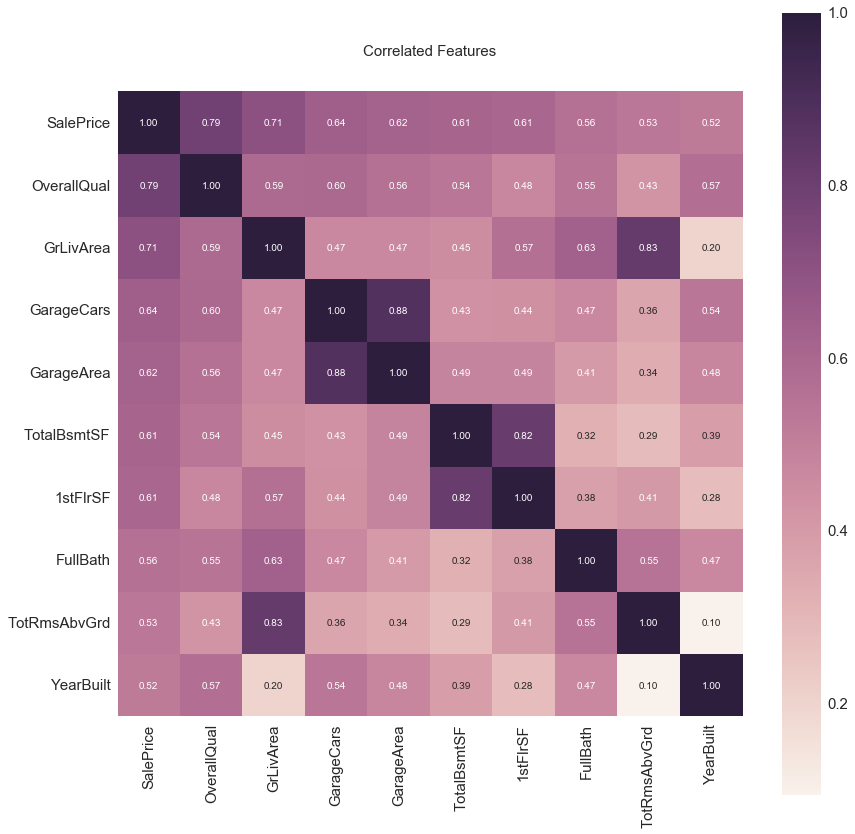

In [140]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(14,14))
plt.title('Correlated Features', y=1.05, size=15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

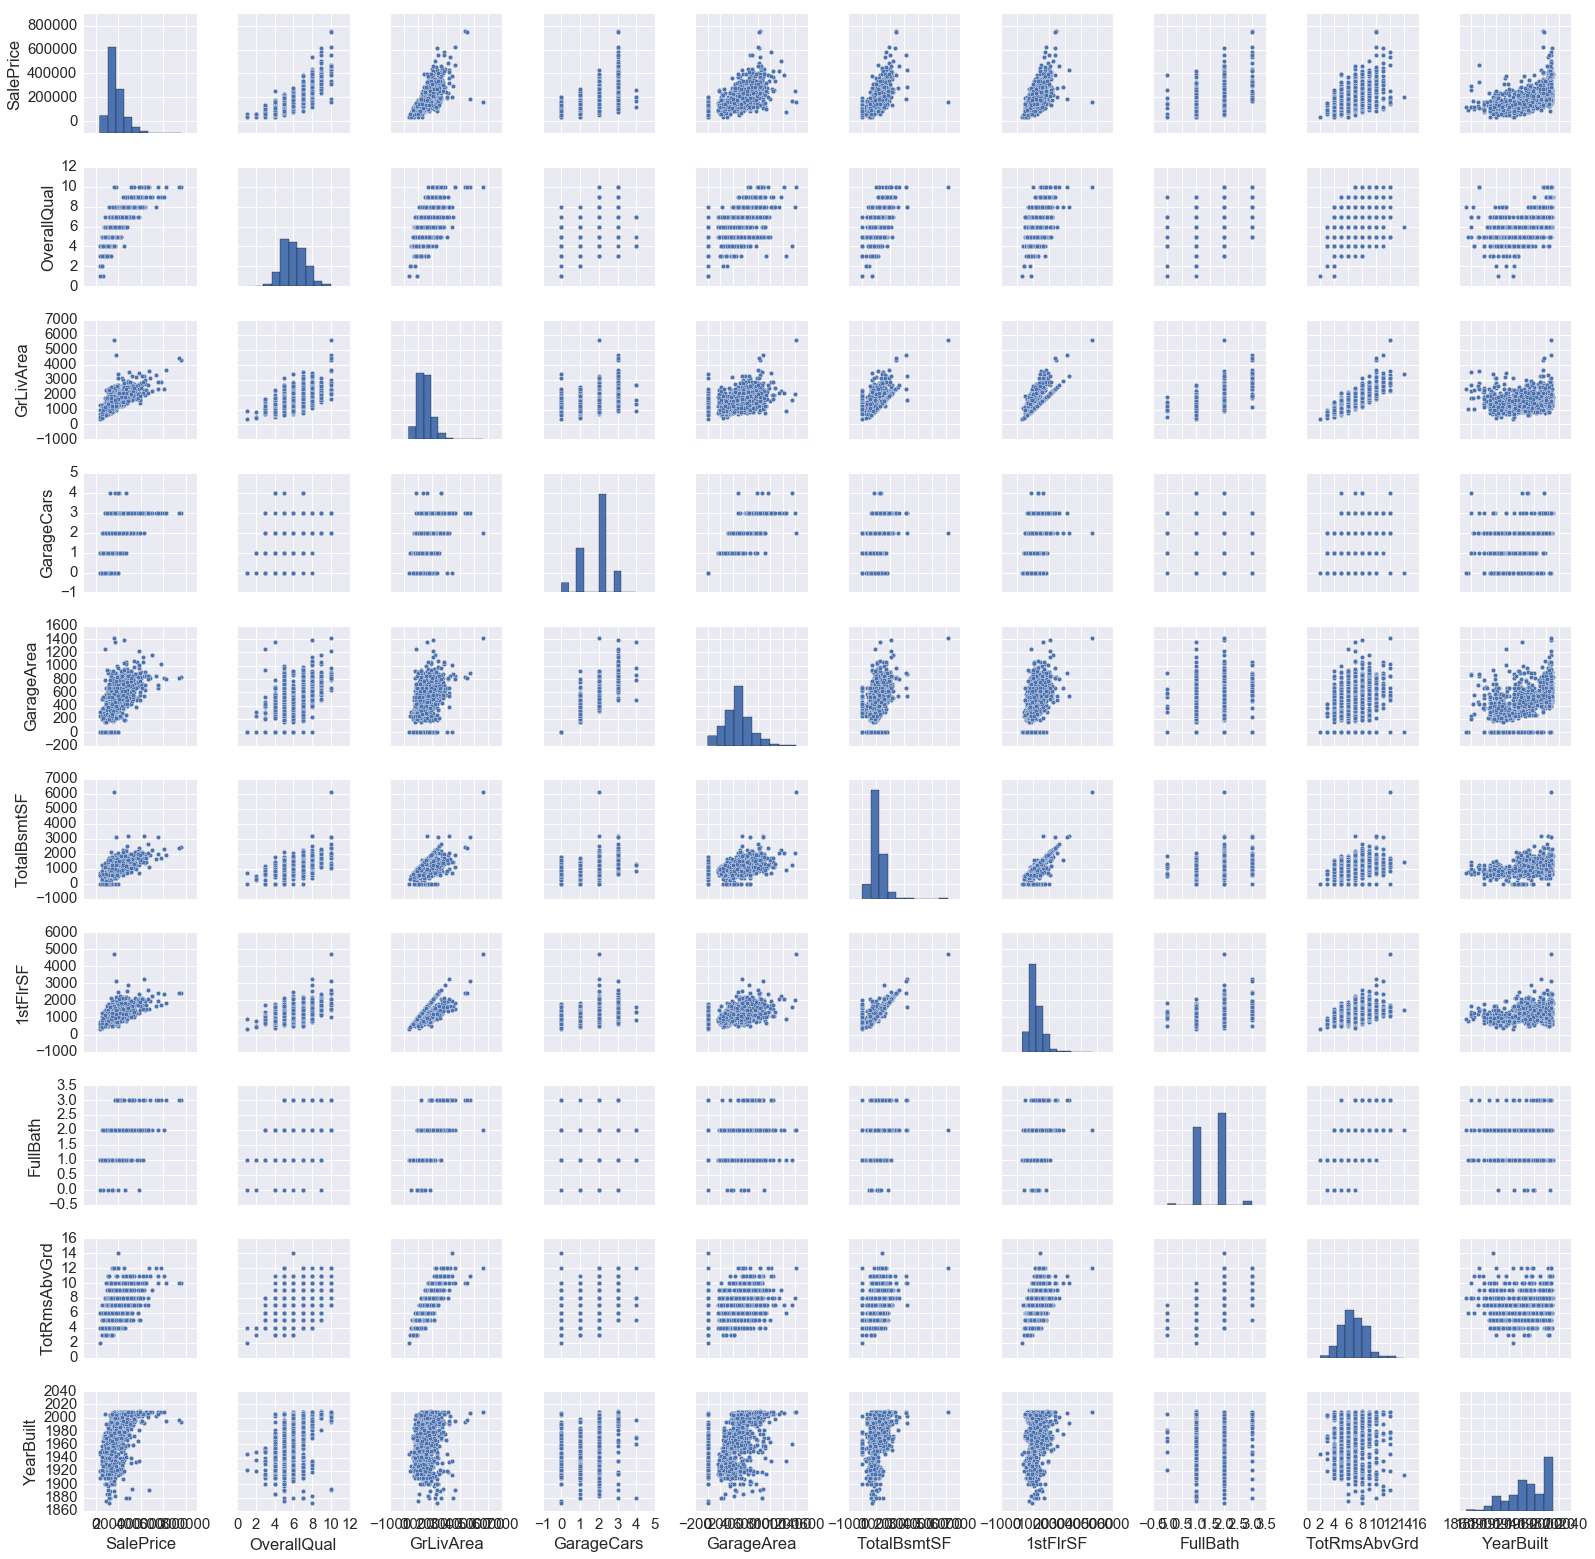

In [141]:
#Uncomment while submitting
colNames = [u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars', u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath', u'TotRmsAbvGrd', u'YearBuilt']
g = sns.pairplot(train[colNames], size=2.2) 
plt.show()


### Univariate Analysis

How this variable is distributed. Establish a threshold that defines an observation as an outlier. Data standardization means converting data values to have mean of 0 and a standard deviation of 1.


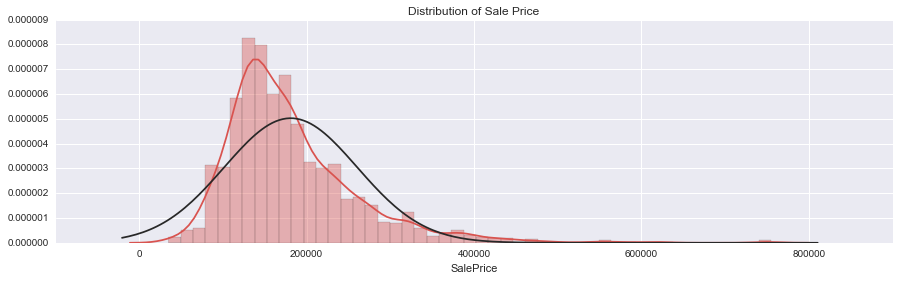

In [142]:
from scipy.stats import norm
sns.set(rc={"figure.figsize": (15, 4)}); 
sns.distplot(train['SalePrice'], fit=norm, color='#d9534f', kde=True)
plt.title("Distribution of Sale Price");

In [143]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [144]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

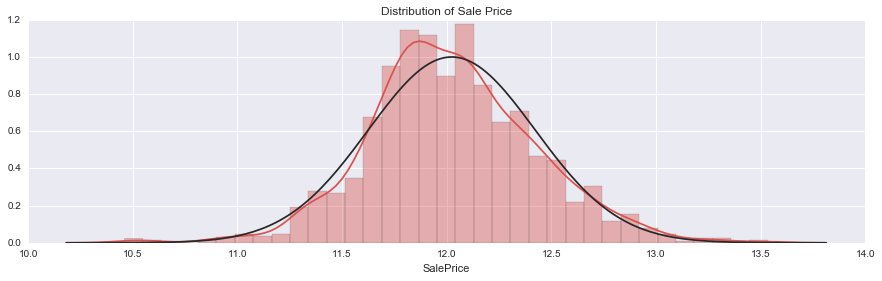

In [145]:
sns.set(rc={"figure.figsize": (15, 4)}); 
sns.distplot(train['SalePrice'], fit=norm, color='#d9534f', kde=True)
plt.title("Distribution of Sale Price");

In [146]:
#skewness and kurtosis after log transformations
print("Post log transformation Skewness: %f" % train['SalePrice'].skew())
print("Post log transformation Kurtosis: %f" % train['SalePrice'].kurt())

Post log transformation Skewness: 0.121335
Post log transformation Kurtosis: 0.809532


### Bivariate Analysis ###

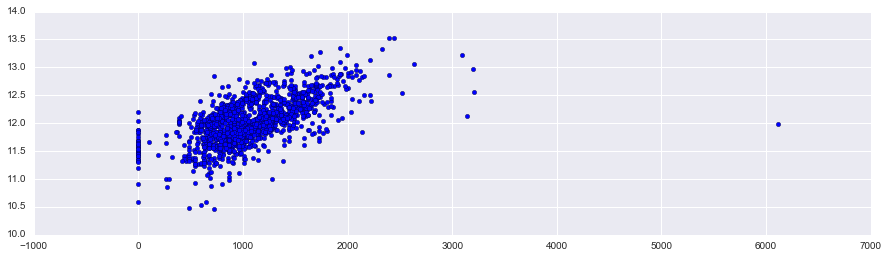

In [147]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice']);

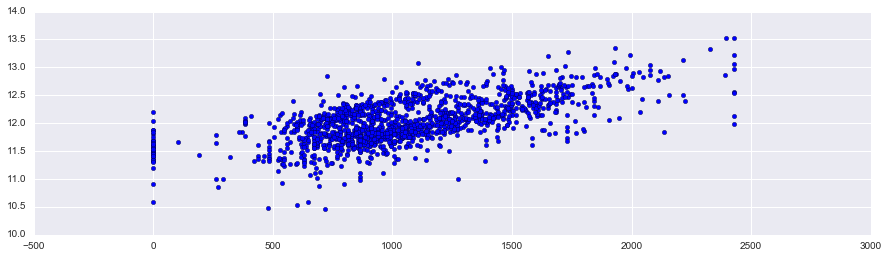

In [148]:
#Outliers in Total basement Area remove them
upper_limit = np.percentile(train.TotalBsmtSF.values, 99.5)
train['TotalBsmtSF'].ix[train['TotalBsmtSF'] > upper_limit] = upper_limit

plt.scatter(train.TotalBsmtSF, train["SalePrice"].values);

***  Ground Floor Living Area ***

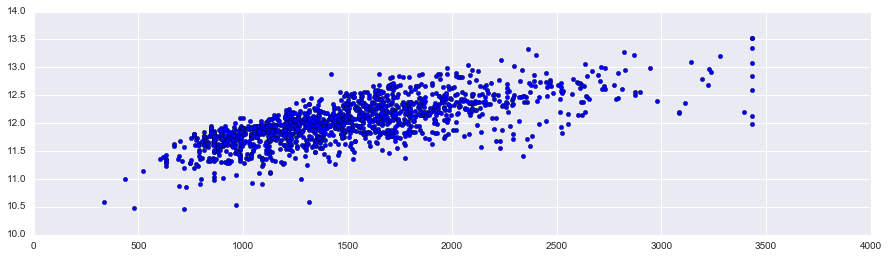

In [149]:
upper_limit = np.percentile(train.GrLivArea.values, 99.5)
train['GrLivArea'].ix[train['GrLivArea'] > upper_limit] = upper_limit
plt.scatter(train['GrLivArea'], train['SalePrice']);

*** Garage Area ***

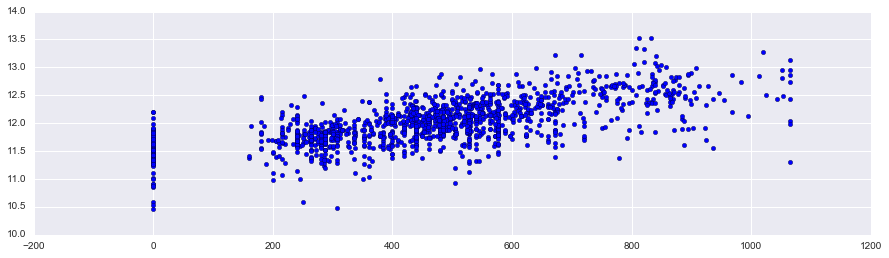

In [150]:
upper_limit = np.percentile(train.GarageArea.values, 99.5)
train['GarageArea'].ix[train['GarageArea'] > upper_limit] = upper_limit
plt.scatter(train['GarageArea'], train['SalePrice']);

*** Garage Cars ***

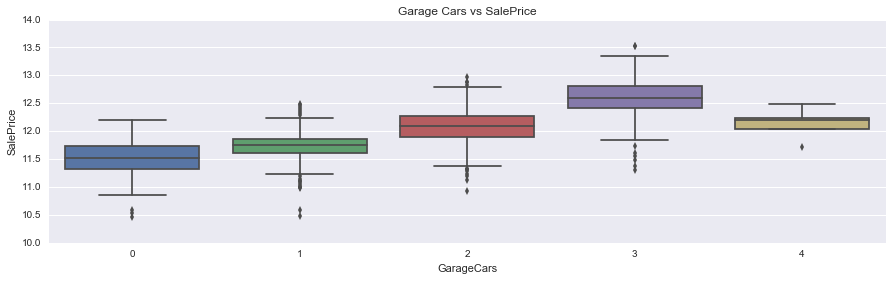

In [151]:
sns.boxplot(x='GarageCars', y='SalePrice', data=train)
plt.title('Garage Cars vs SalePrice')
plt.show();

*** First Floor ***

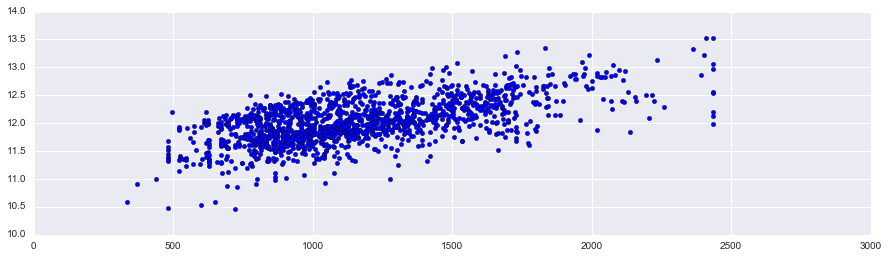

In [152]:
upper_limit = np.percentile(train['1stFlrSF'].values, 99.5)
train['1stFlrSF'].ix[train['1stFlrSF'] > upper_limit] = upper_limit
plt.scatter(train['1stFlrSF'], train['SalePrice']);

*** Full bath ***

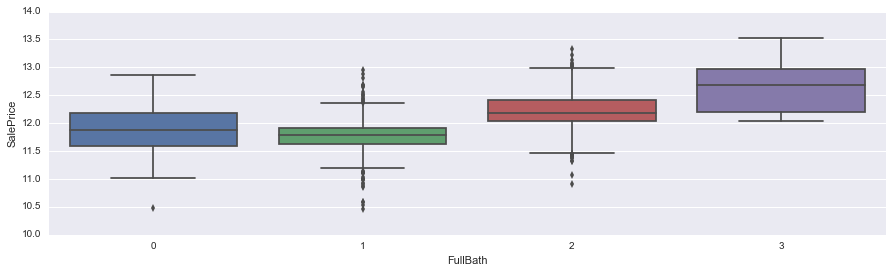

In [153]:
sns.boxplot('FullBath', 'SalePrice', data=train);

*** Year Built ***

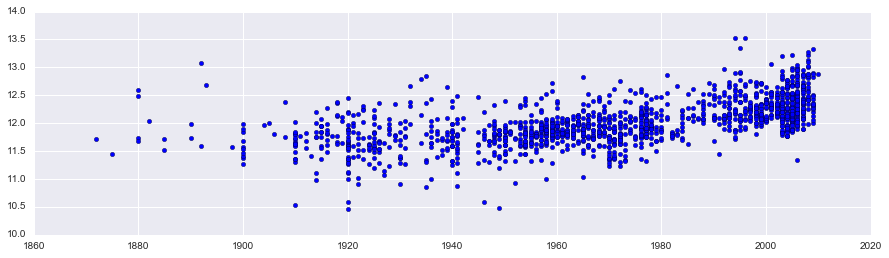

In [154]:
plt.scatter(train['YearBuilt'], train['SalePrice']);

*** Year Remodeled ***

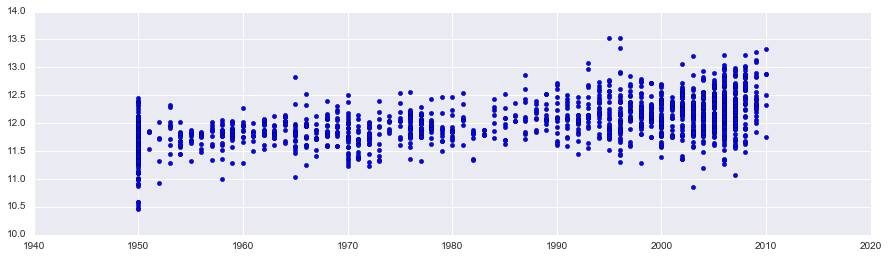

In [155]:
plt.scatter(train['YearRemodAdd'], train['SalePrice']);

*** Total Rooms above Ground floor ***

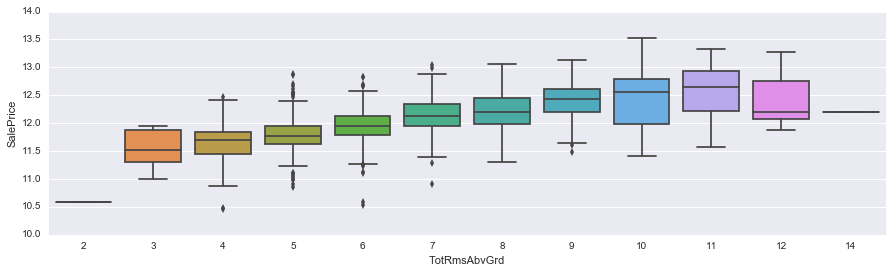

In [156]:
sns.boxplot(train['TotRmsAbvGrd'], train['SalePrice']);

*** MasVnrArea ***

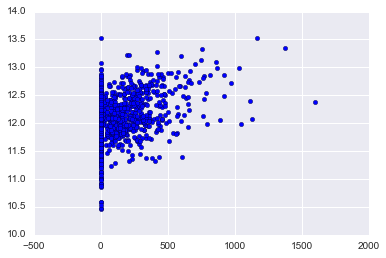

In [157]:
sns.set(rc={"figure.figsize": (6, 4)}); 
plt.scatter(x=train['MasVnrArea'], y=train['SalePrice'], data = train);

*** MasVnrType ***

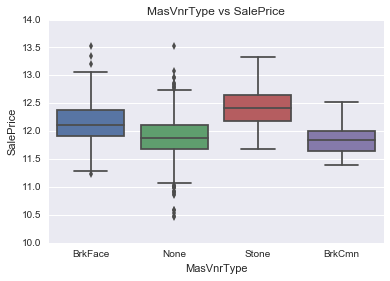

In [158]:
sns.boxplot(x=train['MasVnrType'], y=train['SalePrice'], data = train);
plt.title('MasVnrType vs SalePrice');

*** Electrical ***

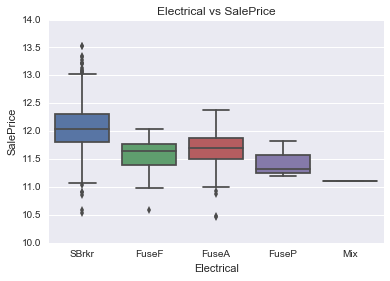

In [159]:
sns.boxplot(x=train['Electrical'], y=train['SalePrice'], data = train);
plt.title('Electrical vs SalePrice');

*** Heating Place Quality ***

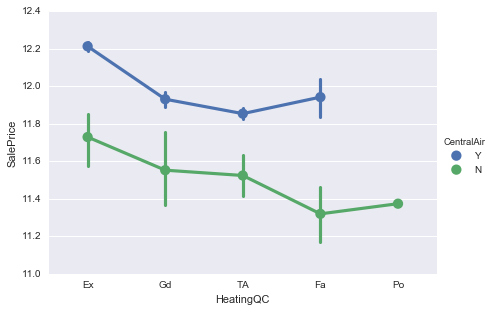

In [160]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, size = 4.5, aspect = 1.4);


*** Fire Places ***

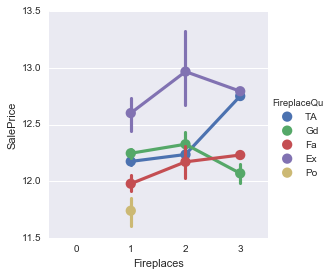

In [161]:
sns.factorplot("Fireplaces", "SalePrice", data=train, hue="FireplaceQu");

*** Fence ***

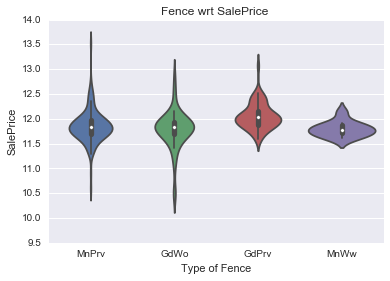

In [162]:
sns.violinplot(train['Fence'], train['SalePrice'])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");

*** Zone classification ***

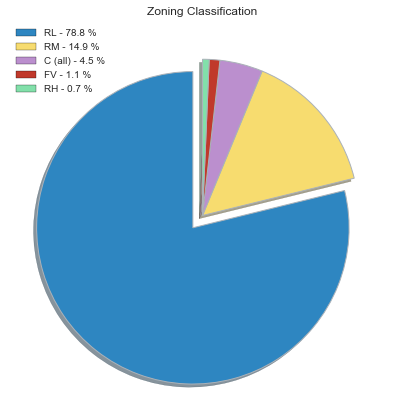

In [163]:
explode=[0.1,0,0,0,0]
labels = train['MSZoning'].unique()
count = train['MSZoning'].value_counts().values
parcent = 100. * count / count.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

color_codes = ['#2e86c1', '#f7dc6f', '#bb8fce', '#c0392b', '#82e0aa']
fig = plt.figure(figsize=(7, 7))
patches, texts= plt.pie(count, colors=color_codes, explode=explode, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')
for patch in patches:
    patch.set_linewidth(1)
    patch.set_edgecolor('#abb2b9')
    
plt.title("Zoning Classification")
plt.show();

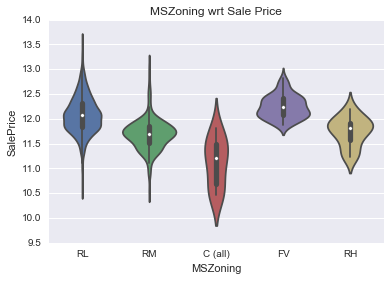

In [164]:
sns.violinplot(train.MSZoning, train['SalePrice'])
plt.title('MSZoning wrt Sale Price');

*** Treating missing values ***

In [165]:
#dealing with missing data 
train = train.drop((missing_data[missing_data['Percent'] > 0.06]).index, axis=1)
test = test.drop((missing_data[missing_data['Percent'] > 0.06]).index, axis=1)

In [166]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

*** Treating categorical values ***

In [168]:
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [169]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

### Model & Predict ###
Let us consider 
- Ridge Model
- Lasso Model
- XGBoost Model

In [170]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


In [171]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


In [172]:
model_ridge = Ridge()

In [173]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 85, 95]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]


In [175]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

In [177]:
cv_ridge.min()

0.12004446274983478

In [178]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()


0.11835256174588382

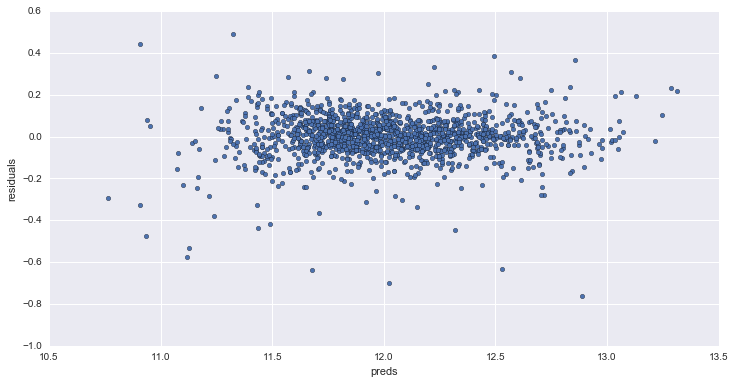

In [179]:
#Check residuals:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter");


In [180]:
#Adding an xgboost model:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

In [181]:
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

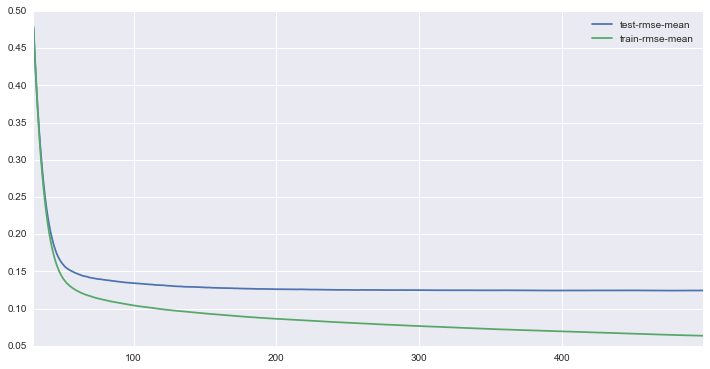

In [182]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot();

In [183]:
#the params were tuned using xgb.cv
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [184]:
model_ridge.fit(X_train, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [185]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))
ridge_preds = np.expm1(model_ridge.predict(X_test))

In [186]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds, 'ridge':ridge_preds})
predictions.head()

,lasso,ridge,xgb
0,121198.436916,117745.228312,119658.867188
1,144751.758155,151952.190186,156843.593750
2,179039.011778,184332.978133,186631.218750
3,198331.676581,201413.204911,191528.109375
4,192693.216535,197309.235841,187180.031250


*** Comparing XGB & Lasso Model  predicted values  ***

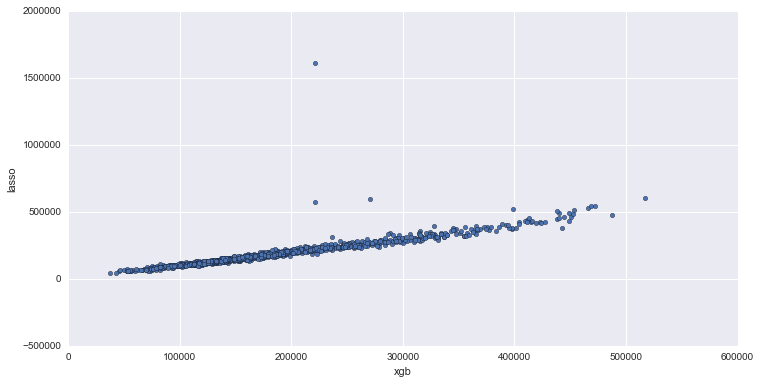

In [187]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.head()
predictions.plot(x = "xgb", y = "lasso", kind = "scatter");


*** Comparing Ridge & Lasso Model  predicted values  ***

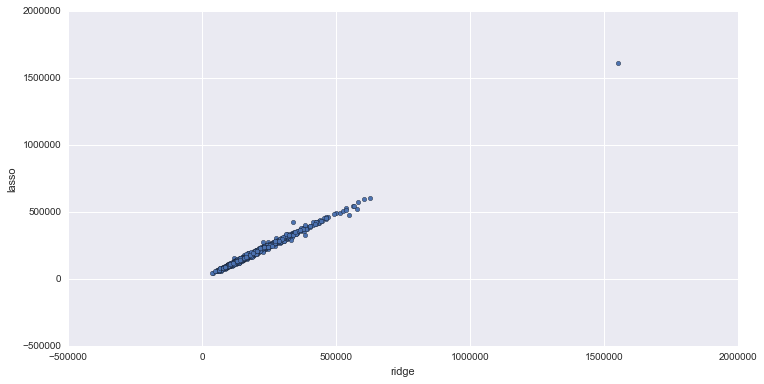

In [188]:
predictions = pd.DataFrame({"lasso":lasso_preds, 'ridge':ridge_preds})
predictions.head()
predictions.plot(x = "ridge", y = "lasso", kind = "scatter");


Observe that there is one predicted value around 1600K. I believe it is farming land. 

*** Conclusion : ***
Ridge & Lasso model predictions are very close. I have choosen Lasso model for submission.
Mean difference of 
 - Lasso & Ridge is = -363.5569
 - Lasso & XGB is = 1874.7735
 
 
*** Submission ***

In [189]:
predictions = pd.DataFrame({'id':test.Id, 'lasso':lasso_preds})
predictions.to_csv("submission.csv", index = False)